In [1]:
!pip3 install tensorflow
!pip3 install tensorflow-hub
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip3 install sentence-transformers



# Data
Define actions and targets and setup data in pandas friendly form

In [2]:
actions = {
    "select_project": "select project",
    "select_folder": "select folder",
    "select_timer": "select timer"
}
timers = {
    "pomodoro": "Pomodoro 25",
    "ultradian": "Ultradian rhytm 90",
    "flow": "Flow stopwatch",
    "just": "Just 5"
}
projects = {
    "ztm_senior_web": "The Complete Junior to Senior Web Developer Roadmap (2021)",
    "ztm_machine_learning": "Complete Machine Learning and Data Science Bootcamp 2021",
    "adv_django": "Build a Backend REST API with Python and Django - Advanced",
    "ztm_junior_web": "The Complete Web Developer in 2021: Zero to Mastery"
}
folders = {
    "school": "School",
    "work": "Work",
    "personal_growth": "Personal Growth"
}

templates = {
    "timer": "I am trying to choose timer called {}",
    "project": "The project I am trying to select is named {}",
    "folder": "I want to view folder called {}"
}

In [3]:
def map_results(res):
    mapped = dict(zip(res["labels"], res["scores"]))
    max_prob = min(mapped, key=mapped.get)
    return mapped, max_prob

In [4]:
def print_results(mapped, max_prob):
    for key, val in mapped.items():
        print(f"{key} => {val}")
    print(f"Max: {max_prob}")

In [5]:
def target_from_action(action):
    if (action == actions["select_project"]):
        return list(projects.values())
    elif (action == actions["select_timer"]):
        return list(timers.values())
    elif (action == actions["select_folder"]):
        return list(folders.values())
    else:
        return []

In [6]:
# convert potentials values to vetors lowercase before and return scores
def get_scores(value : tuple,potential_values : list):
    responses = {}
    labels = []
    scores = []
    for pot_v in potential_values:
          labels.append(pot_v)
          scores.append(tf.keras.losses.cosine_similarity(
                            value[1],embed([pot_v.lower()]),axis=-1 
                            ))
    responses["labels"]=labels
    responses["scores"]=scores
    return responses


In [7]:
data = [
    ["select web",
    actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["select project zero to mastery web dev in 2021",
     actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["set project to zero to mastery web dev in 2021",
     actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["choose projects to zero to mastery web dev in 2021",
    actions["select_project"], projects["ztm_junior_web"], templates["project"]],
    ["select project machine learning bootcamp",
    actions["select_project"], projects["ztm_machine_learning"], templates["project"]],
    ["select project junior to senior web dev",
    actions["select_project"], projects["ztm_senior_web"], templates["project"]],
    ["select project build a backend rest api with python and django advanced",
    actions["select_project"], projects["adv_django"], templates["project"]],
    ["select project rest api with django",
    actions["select_project"], projects["adv_django"], templates["project"]],
    ["select timer 25",
    actions["select_timer"], timers["pomodoro"], templates["timer"]],
    ["select timer pomodoro",
    actions["select_timer"], timers["pomodoro"], templates["timer"]],
    ["select timer rhytm",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer 90",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer ultradian rhytm 90",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
    ["select timer ultradian ",
    actions["select_timer"], timers["ultradian"], templates["timer"]],
]
column_names = ["Command", "Expected action", "Expected target"]


# Tests
Testing for commands defined

In [8]:

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [9]:
# convert potentials values to vetors lowercase before and return scores
def get_scores(value ,potential_values : list):
    responses = {}
    labels = []
    scores = []
    for pot_v in potential_values:
          labels.append(pot_v)
          scores.append(tf.keras.losses.cosine_similarity(
                            value[1],sbert_model.encode(pot_v.lower()),axis=-1 
                            ))
    responses["labels"]=labels
    responses["scores"]=scores
    return responses

In [12]:


results = []
vec_data = []
actions_match = None
targets_match = None
# sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
# sbert_model = SentenceTransformer('stsb-roberta-large')
sbert_model = SentenceTransformer('paraphrase-distilroberta-base-v1') #best
# sbert_model = SentenceTransformer('nli-bert-large')
# sbert_model = SentenceTransformer('nli-roberta-base')
# sbert_model = SentenceTransformer('nli-bert-large-cls-pooling')





data2 = []
# prepare data as vectors
for value in data:
  vec_row = []
  normal_row = []
  for i in range(3):
    vec_row.append((value[i], sbert_model.encode([value[i].lower()])))
    normal_row.append((value[i]))
  vec_data.append(vec_row)
  data2.append(normal_row)

for vec_value in vec_data:
  print(vec_value[0][0])
  #Action
  res_action = get_scores(vec_value[0], list(actions.values()))
  map_action, max_action = map_results(res_action)
  print_results(map_action, max_action)
  
  if(max_action == vec_value[1][0]):
      actions_match = 1
      print("Success!")
  else:
      actions_match = 0
      print("Failure")
  #Target

  targets = target_from_action(max_action)

  res_target = get_scores(vec_value[0], targets)
  map_target, max_target = map_results(res_target)
  print_results(map_target, max_target)
  if(max_target == vec_value[2][0]):
      targets_match = 1
      print("Success!")
  else:
      targets_match = 0
      print("Failure")

  results.append([value[0], max_action, max_target, actions_match, targets_match])

  print(60*"--")


select web
select project => [-0.5105037]
select folder => [-0.50781685]
select timer => [-0.43686292]
Max: select project
Success!
The Complete Junior to Senior Web Developer Roadmap (2021) => [-0.12863699]
Complete Machine Learning and Data Science Bootcamp 2021 => [-0.00017409]
Build a Backend REST API with Python and Django - Advanced => [-0.07130364]
The Complete Web Developer in 2021: Zero to Mastery => [-0.10341556]
Max: The Complete Junior to Senior Web Developer Roadmap (2021)
Failure
------------------------------------------------------------------------------------------------------------------------
select project zero to mastery web dev in 2021
select project => [-0.39230597]
select folder => [-0.2264255]
select timer => [-0.21783781]
Max: select project
Success!
The Complete Junior to Senior Web Developer Roadmap (2021) => [-0.47861323]
Complete Machine Learning and Data Science Bootcamp 2021 => [-0.49524736]
Build a Backend REST API with Python and Django - Advanced => 

# Visualizing

In [13]:
df = pd.DataFrame(data2, columns=column_names)
df

,Command,Expected action,Expected target
0,select web,select project,The Complete Web Developer in 2021: Zero to Ma...
1,select project zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...
2,set project to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...
3,choose projects to zero to mastery web dev in ...,select project,The Complete Web Developer in 2021: Zero to Ma...
4,select project machine learning bootcamp,select project,Complete Machine Learning and Data Science Boo...
5,select project junior to senior web dev,select project,The Complete Junior to Senior Web Developer Ro...
6,select project build a backend rest api with p...,select project,Build a Backend REST API with Python and Djang...
7,select project rest api with django,select project,Build a Backend REST API with Python and Djang...
8,select timer 25,select timer,Pomodoro 25
9,select timer pomodoro,select timer,Pomodoro 25


In [14]:
res_cols = ["Command", "Recognized Action", "Recognized Target", "Actions Match", "Targets Match"]
df_results = pd.DataFrame(results, columns=res_cols)
df_results

,Command,Recognized Action,Recognized Target,Actions Match,Targets Match
0,select timer ultradian,select project,The Complete Junior to Senior Web Developer Ro...,1,0
1,select timer ultradian,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
2,select timer ultradian,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
3,select timer ultradian,select project,The Complete Web Developer in 2021: Zero to Ma...,1,1
4,select timer ultradian,select project,Complete Machine Learning and Data Science Boo...,1,1
5,select timer ultradian,select project,The Complete Junior to Senior Web Developer Ro...,1,1
6,select timer ultradian,select project,Build a Backend REST API with Python and Djang...,1,1
7,select timer ultradian,select project,Build a Backend REST API with Python and Djang...,1,1
8,select timer ultradian,select timer,Just 5,1,0
9,select timer ultradian,select timer,Pomodoro 25,1,1


In [15]:
joined_df = df.set_index("Command").join(df_results.set_index("Command"))
joined_df

,Expected action,Expected target,Recognized Action,Recognized Target,Actions Match,Targets Match
Command,,,,,,
choose projects to zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,NaN,NaN,NaN,NaN
select project build a backend rest api with python and django advanced,select project,Build a Backend REST API with Python and Djang...,NaN,NaN,NaN,NaN
select project junior to senior web dev,select project,The Complete Junior to Senior Web Developer Ro...,NaN,NaN,NaN,NaN
select project machine learning bootcamp,select project,Complete Machine Learning and Data Science Boo...,NaN,NaN,NaN,NaN
select project rest api with django,select project,Build a Backend REST API with Python and Djang...,NaN,NaN,NaN,NaN
select project zero to mastery web dev in 2021,select project,The Complete Web Developer in 2021: Zero to Ma...,NaN,NaN,NaN,NaN
select timer 25,select timer,Pomodoro 25,NaN,NaN,NaN,NaN
select timer 90,select timer,Ultradian rhytm 90,NaN,NaN,NaN,NaN
select timer pomodoro,select timer,Pomodoro 25,NaN,NaN,NaN,NaN


In [16]:
joined_df["Actions Match"].value_counts()

1.0    14
Name: Actions Match, dtype: int64

In [17]:
joined_df["Targets Match"].value_counts()

1.0    12
0.0     2
Name: Targets Match, dtype: int64

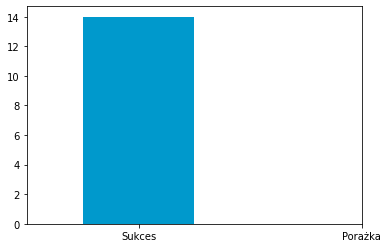

In [18]:
joined_df["Actions Match"].value_counts().plot(kind="bar", color=["#0099CC", "#CC0000"])
plt.xticks(np.arange(0, 1, step=1))
plt.xticks(np.arange(2), ('Sukces', 'Porażka'))
plt.xticks(np.arange(2), rotation = 0)
plt.show()

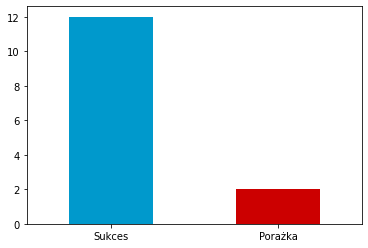

In [19]:
joined_df["Targets Match"].value_counts().plot(kind="bar", color=["#0099CC", "#CC0000"])
plt.xticks(np.arange(0, 1, step=1))
plt.xticks(np.arange(2), ('Sukces', 'Porażka'))
plt.xticks(np.arange(2), rotation = 0)
plt.show()